# Checking if dataset was loaded to drive properly
---

drive has issues!

In [ ]:
# setting the drive directory
import os
import sys
sys.path.append('/content/drive/MyDrive/masters-project')
os.chdir("/content/drive/MyDrive/masters-project")


In [ ]:
# path of datasets
image_train_directory = "_assets//split-dataset//train-data//original_images//" 
mask_train_directory = '_assets//split-dataset//train-data//RGB_color_image_masks//'

image_test_directory = "_assets//split-dataset//test-data//original_images//" 
mask_test_directory = '_assets//split-dataset//test-data//RGB_color_image_masks//'


In [ ]:
import os 

def check(dir):
  for path, dirs, files in os.walk(dir):
    return len(files)
  
im1 = check(image_train_directory)
ms1 = check(mask_train_directory)
im2 = check(image_test_directory)
ms2 = check(mask_test_directory)

print(im1, ms1, im2, ms2)

320 320 80 80


# Data preprocessing
---
Basically saving all the memory intensive np arrays to .npy files so that the load can take care of memory.

In [ ]:
import cv2
import numpy as np

In [ ]:
# Preparing the dataset

def prepare_image_dataset(root_directory):
  """Returns the dataset in list form. """
  dataset = []
  images = sorted(os.listdir(root_directory))
  for item in images:
    image = cv2.imread(root_directory + '//' + item,1)
    resized = custom_resize(image)
    dataset.append(resized)
  
  return dataset


def prepare_mask_dataset(root_directory):
  """Returns the dataset in list form. """
  dataset = []
  images = sorted(os.listdir(root_directory))
  for item in images:
    image = cv2.imread(root_directory + '//' + item,1)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    resized = custom_resize(image)
    dataset.append(resized)
  
  return dataset


def custom_resize(image):
  """Reduces the dimensions of the given image to custom dimension without changing the aspect ratio (Hard coded). """
  dimension = (512,512)  #Maintaing original aspect ratio
  resized = cv2.resize(image, dimension, interpolation = cv2.INTER_CUBIC)
  return resized

In [ ]:
image_train_dataset = np.array(prepare_image_dataset(image_train_directory))
mask_train_dataset = np.array(prepare_mask_dataset(mask_train_directory))

In [ ]:
image_test_dataset = np.array(prepare_image_dataset(image_test_directory))
mask_test_dataset = np.array(prepare_mask_dataset(mask_test_directory))

In [ ]:
np.save('image-train-data-file', image_train_dataset)
np.save('mask-train-data-file', mask_train_dataset)
np.save('image-test-data-file', image_test_dataset)
np.save('mask-test-data-file', mask_test_dataset)

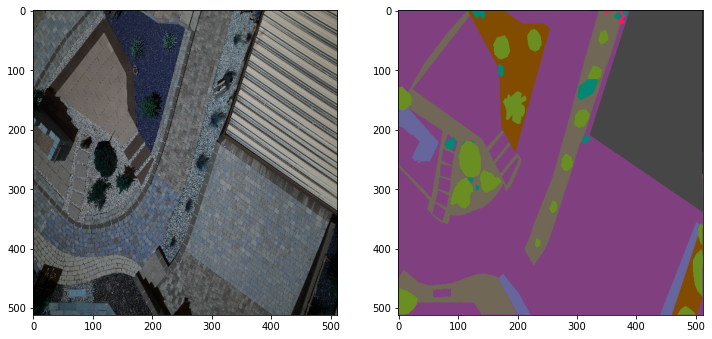

In [ ]:
# Checking if train set is done right

import random
from matplotlib import pyplot as plt
image_number = random.randint(0, len(image_train_dataset))
#image_number = 16
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_train_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_train_dataset[image_number])
plt.show()

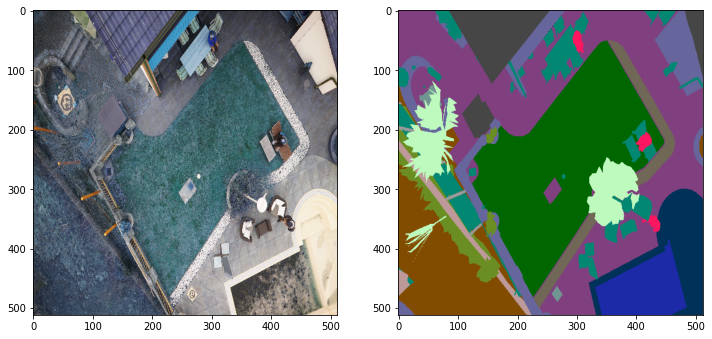

In [ ]:
# checking if test set is done right

image_number = random.randint(0, len(image_test_dataset))
#image_number = 16
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_test_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_test_dataset[image_number])
plt.show()

In [ ]:
# Labels in RGB format

unlabeled   = np.array([0, 0, 0]) 
paved_area  = np.array([128, 64, 128]) 
dirt        = np.array([130, 76, 0]) 
grass       = np.array([0, 102, 0]) 
gravel      = np.array([112, 103, 87]) 
water       = np.array([28, 42, 168]) 
rocks       = np.array([48, 41, 30]) 
pool        = np.array([0, 50, 89]) 
vegetation  = np.array([107, 142, 35]) 
roof        = np.array([70, 70, 70]) 
wall        = np.array([102, 102, 156]) 
window      = np.array([254, 228, 12]) 
door        = np.array([254, 148, 12]) 
fence       = np.array([190, 153, 153]) 
fence_pole  = np.array([153,153,153]) 
person      = np.array([255, 22, 96]) 
dog         = np.array([102, 51, 0]) 
car         = np.array([9, 143, 150]) 
bicycle     = np.array([119, 11, 32]) 
tree        = np.array([51, 51, 0]) 
bald_tree   = np.array([190, 250, 190]) 
ar_marker   = np.array([112, 150, 146]) 
obstacle    = np.array([2, 135, 115]) 
conflicting = np.array([255, 0, 0]) 

label = mask_train_dataset[99]
print(label.shape)

# custom function to convert RGB to labels (Integer Encoding)

def rgb_to_2D_label(label):
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == unlabeled,axis=-1)] = 0
    label_seg [np.all(label==paved_area,axis=-1)] = 1
    label_seg [np.all(label==dirt,axis=-1)] = 2
    label_seg [np.all(label==grass,axis=-1)] = 3
    label_seg [np.all(label==gravel,axis=-1)] = 4
    label_seg [np.all(label==water,axis=-1)] = 5
    label_seg [np.all(label==rocks,axis=-1)] = 6
    label_seg [np.all(label==pool,axis=-1)] = 7
    label_seg [np.all(label==vegetation,axis=-1)] = 8
    label_seg [np.all(label==roof,axis=-1)] = 9
    label_seg [np.all(label==wall,axis=-1)] = 10
    label_seg [np.all(label==window,axis=-1)] = 11
    label_seg [np.all(label==door,axis=-1)] = 12
    label_seg [np.all(label==fence,axis=-1)] = 13
    label_seg [np.all(label==fence_pole,axis=-1)] = 14
    label_seg [np.all(label==person,axis=-1)] = 15
    label_seg [np.all(label==dog,axis=-1)] = 16
    label_seg [np.all(label==car,axis=-1)] = 17
    label_seg [np.all(label==bicycle,axis=-1)] = 18
    label_seg [np.all(label==tree,axis=-1)] = 19
    label_seg [np.all(label==bald_tree,axis=-1)] = 20
    label_seg [np.all(label==ar_marker,axis=-1)] = 21
    label_seg [np.all(label==obstacle,axis=-1)] = 22
    label_seg [np.all(label==conflicting,axis=-1)] = 23

    
    label_seg = label_seg[:,:,0]                               
    
    return label_seg

(512, 512, 3)


In [ ]:
# creating labels for training

labels_train = []

for i in range(mask_train_dataset.shape[0]):
    label = rgb_to_2D_label(mask_train_dataset[i])
    labels_train.append(label)    

labels_train = np.array(labels_train)   
labels_train = np.expand_dims(labels_train, axis=3)
 
print("Unique labels in label training dataset are: ", np.unique(labels_train))

Unique labels in label training dataset are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [ ]:
np.save('labels-train', labels_train)

In [ ]:
# creating labels for testing

labels_test = []

for i in range(mask_test_dataset.shape[0]):
    label = rgb_to_2D_label(mask_test_dataset[i])
    labels_test.append(label)    

labels_test = np.array(labels_test)   
labels_test = np.expand_dims(labels_test, axis=3)
 
print("Unique labels in label testing dataset are: ", np.unique(labels_test))

Unique labels in label testing dataset are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [ ]:
np.save('labels-test', labels_test)